<a href="https://colab.research.google.com/github/Projas-14/Inteligencia_artificial/blob/master/Regresion%20lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Regresión Lineal - Grupo 10 ICI3244-1-(1S2023)

Integrantes:

*   Victor Granda
*   Ramiro Magnatera
*   Benjamin Rojas
*   Paul Rojas
*   Vicente Sarabia

# Módulo de Regresión Lineal



# Introducción

En este proyecto, se usó un dataset con información de vinos portugueses en dos archivos: "winequality-red.csv" y "winequality-white.csv", que incluyen datos de vinos rojos y blancos de la viña.

Se genero un análisis exploratorio para ver la relación entre los atributos y la variable a predecir. Igualmente, se solicitó elegir tres rasgos que expliquen bien la variable a predecir (calidad del vino), y para cada uno, realizar una regresión lineal simple utilizando los algoritmos "*batch gradient descent*" y "*stochastic gradient descent*".  comparando los resultados en función de las métricas de evaluación de las métricas como R² y R² - ajustado.

El informe incluirá gráficos con códigos, tablas de resultados y evaluación de métricas discutidas en clase.

Por último, se analizarán y compararán los resultados obtenidos con el "*algoritmo batch*" y el "*stochastic gradient descent*". Se prestará atención a las principales diferencias entre ambos algoritmos.


# Importe y definición de funciones necesarias

In [ ]:
#importaciones requeridas para implemntar las Datasets

import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import explained_variance_score
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
np.random.seed(69)

In [ ]:
!git clone "https://github.com/benjarojas/lab2_ia.git" # clone dataset -> lab2_ia/

fatal: destination path 'lab2_ia' already exists and is not an empty directory.


In [ ]:
# Creacion de los dataset "vinos tintos" y "vinos Blancos"

dataset_red = pd.read_csv(os.path.join("lab2_ia/", "winequality-red.csv"), sep=";")
dataset_white = pd.read_csv(os.path.join("lab2_ia/", "winequality-white.csv"), sep=";")

## Batch gradient descent

Se define a continuación la función para el batch gradient descent

In [ ]:
# algoritmo de descenso de gradiente para ajustar una línea de regresión utilizando un conjunto de entrenamiento

def batch_gradiente_descendiente(x_train,y_train,lx):
  # Inicializan los parámetros del modelo:
  # "m" es la pendiente de la línea de regresión
  # "c" es la intersección de la línea de regresión con el eje y
  # alpha es la tasa de aprendizaje
  # n es el número de iteraciones.
  m=0.1
  c=0.01
  alpha=0.01
  n=5000
  # Se realiza el descenso de gradiente utilizando un ciclo for para iterar a través del número de iteraciones n.
  for i in range(n):
    #  Dentro de este ciclo, se utiliza otro ciclo for para iterar a través del tamaño del conjunto de entrenamiento lx
      slope=0
      intercept=0
      # En cada iteración, se calcula la pendiente e intersección de la línea de regresión utilizando la fórmula para el error cuadrático medio (MSE)
      for j in range(lx):
          intercept=intercept+((m*x_train[j]+c)-y_train[j])
          slope=slope+((m*x_train[j]+c)-y_train[j])*x_train[j]
      # Se actualizan los valores de "m" y "c" utilizando la tasa de aprendizaje "alpha"
      c=c-alpha*(intercept/lx)
      m=m-alpha*(slope/lx)
  # la función devuelve los valores actualizados de m y c.
  return m,c

## Stochastic gradient descent

A continuación se define la función para realizar nuevamente la regresión pero esta vez utilizando el gradiente descendente estocástico.

In [ ]:
#  algoritmo de descenso de gradiente estocástico para ajustar una línea de regresión utilizando un conjunto de entrenamiento.
def estocastico_gradiente_descendente(x_train,y_train,lx):
  # Inicialización de los parámetros del modelo:
  # "m" es la pendiente de la línea de regresión
  # "c" es la intersección de la línea de regresión con el eje y
  # alpha es la tasa de aprendizaje
  # n es el número de iteraciones.
  m=0.1
  c=0.5
  alpha=0.001
  n=1000

  # Se realiza el descenso de gradiente utilizando un ciclo for para iterar a través del número de iteraciones n.
  for i in range(n):
      slope=0
      intercept=0
      for j in range(lx):
          random_index=np.random.randint(lx)
          # Se calculan la pendiente e intersección de la línea de regresión utilizando la fórmula para el error cuadrático medio (MSE)
          intercept=intercept+((m*x_train[random_index:random_index+1]+c)-y_train[random_index:random_index+1])
          slope=slope+((m*x_train[random_index:random_index+1]+c)-y_train[random_index:random_index+1])*x_train[random_index:random_index+1]
          # Se actualizan los valores de "m" y "c" utilizando la tasa de aprendizaje "alpha"
          c=c-alpha*(intercept/lx)
          m=m-alpha*(slope/lx)
  return m,c

# Dataset vinos rojos

## EDA

A continuación se realiza una serie de funciones que nos permitirán observar cómo están compuestos los datos.

In [ ]:
# Encabezados de datos de la data  "vinos tintos"

dataset_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Tipos de datos de la data "Vinos tintos"

dataset_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


De esta función en particular es importante observar que no contamos con datos nulos, por lo cual no será necesaria una limpieza de ese tipo de datos.

In [ ]:
# Descipcion de los datos

dataset_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


A continuación, se observará la correlación entre las distintas columnas del dataset, y en base a los resultados que se observen se elegirán los atributos para realizar las regresiones.

<Axes: >

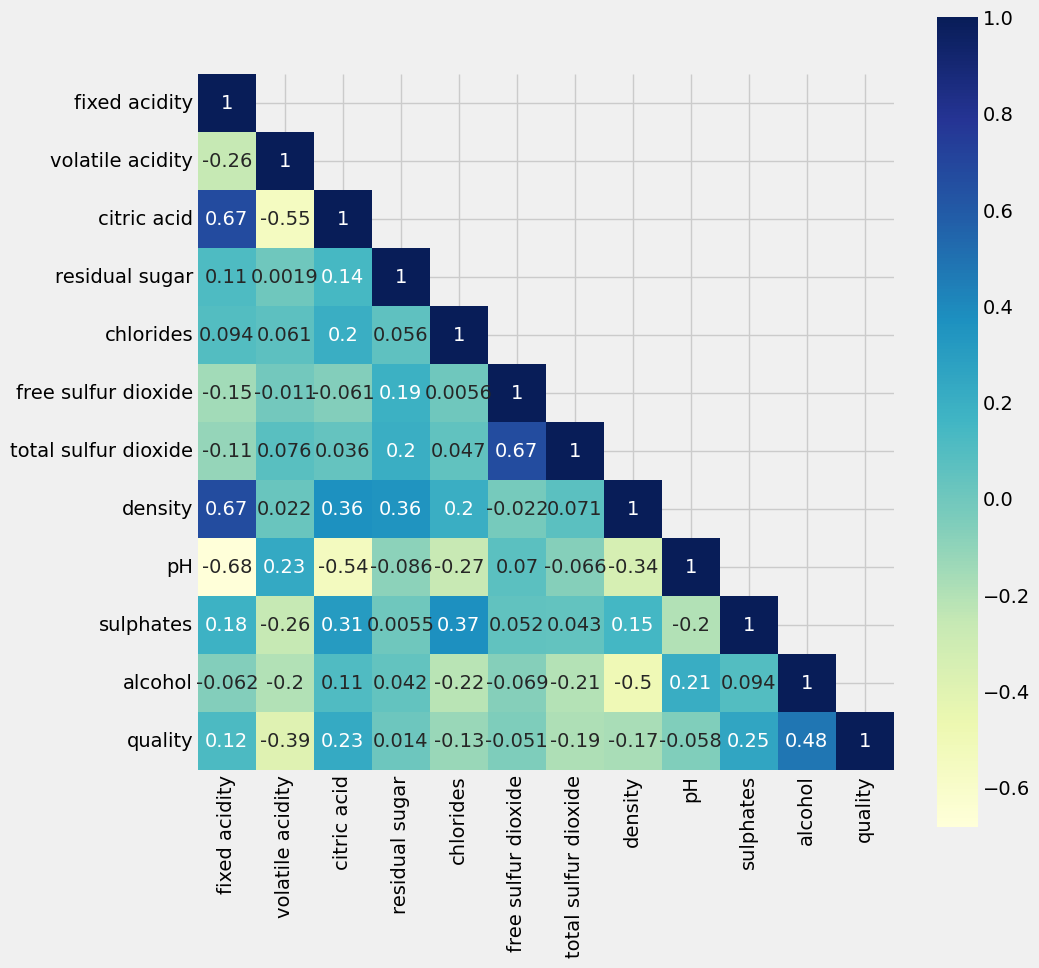

In [ ]:
# Grafica donde se calcula la matriz de correlación.

correlation= dataset_red.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")

Se observa cómo los tres atributos que más correlación (ya sea negativa o positiva) tienen con la calidad del vino para este dataset son el alcohol, los sulfatos y la acidez volatil del vino. Estos atributos son los que se utilizarán para realizar las regresiones correspondientes.

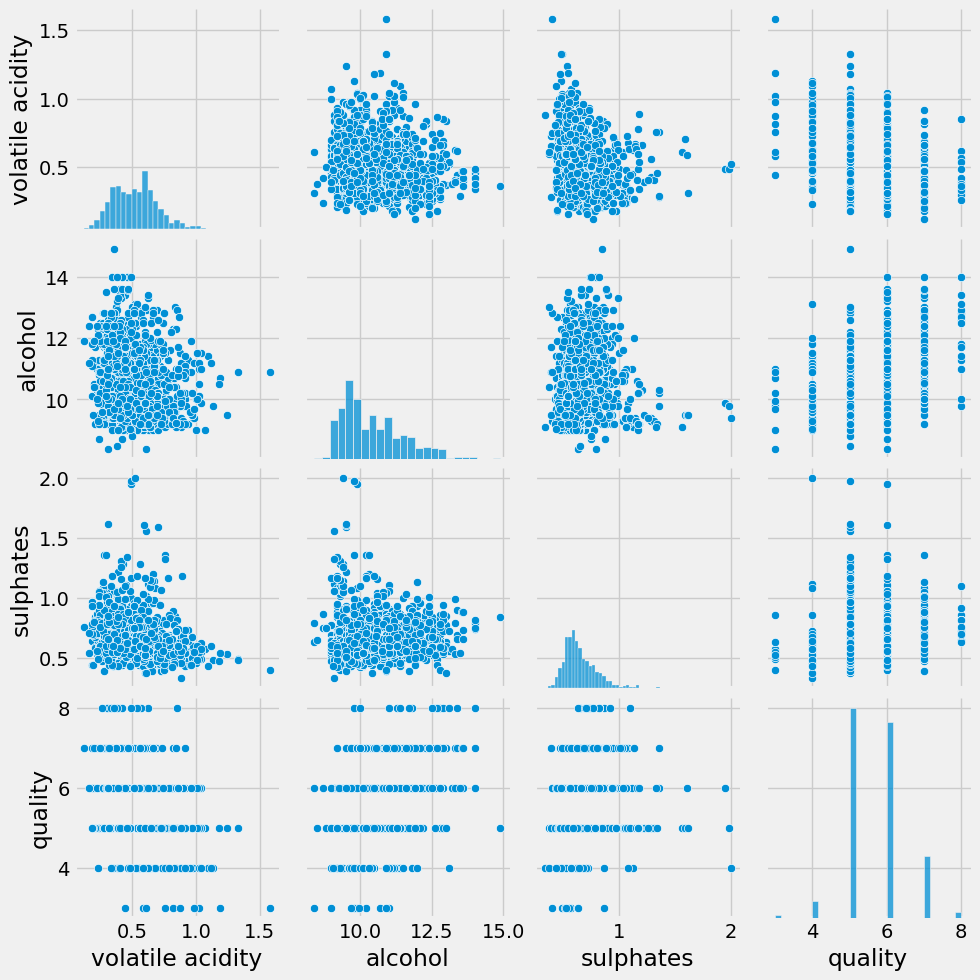

In [ ]:
# El gráfico de pares muestra la relación entre estas cuatro variables
### "volatile acidity", "alcohol", "sulphates" y "quality".

sns.pairplot(dataset_red, vars=["volatile acidity", "alcohol", "sulphates", "quality"])

En esta sección de gráficos podemos observar cómo están relacionados los datos según los atributos elegidos, se observan ciertas tendencias que se explican mediante la correlación anteriormente mencionada. Un ejemplo de esto es cómo la calidad de lo0s vinos suele ir a la baja a medida que la acidez volatil aumenta, correspondiendose esto con la correlación negativa antes mencionada.

## Se procede a utilizar la función del batch gradient descent para cada atributo a analizar.

### Alcohol Batch

In [ ]:
# Dividiendo los datos en entrenamiento y prueba con una semilla aleatoria y una proporción 70-30
x_alcohol=np.array(dataset_red['alcohol'])
y_alcohol=np.array(dataset_red['quality'])
x_train,x_test_alcohol,y_train,y_test=train_test_split(x_alcohol,y_alcohol, test_size = 0.3, random_state=32)
lx=len(x_train)

In [ ]:
# La pendiente y el intercepto obtenidos
m,c=batch_gradiente_descendiente(x_train,y_train,lx)
print(f"Pendiente {m}")
print(f"Interecepto {c}")

Pendiente 0.46558396928658063
Interecepto 0.7495109397964376


In [ ]:
# Predecir los valores de salida correspondientes a los datos de prueba
y_pred_alcohol=np.dot(m,x_test_alcohol)+c


Métricas

In [ ]:
# Calculando diversas métricas para evaluar el desempeño del modelo de regresión lineal.
# Para R cuadrado como para el R cuadradro ajustado
r2_des=r2_score(y_test,y_pred_alcohol)
print("R-cuadrado: ", r2_des)
p=1
n=len(y_test)
r2_adj=1-(1-r2_des)*(n-1)/(n-p-1)
print("R-cuadrado ajustado: ", r2_adj)
r2_alcohol_batch=r2_des
r2_adj_alcohol_batch=1-(1-r2_des)*(n-1)/(n-p-1)
error_alcohol_batch=np.sqrt(mean_squared_error(y_test,y_pred_alcohol))

R-cuadrado:  0.2035258638245827
R-cuadrado ajustado:  0.20185959994137048


### Volatile acidity Batch

In [ ]:
# Dividiendo los datos en entrenamiento y prueba con una semilla aleatoria y una proporción 70-30
x_acidity=np.array(dataset_red['volatile acidity'])
y_acidity=np.array(dataset_red['quality'])
x_train,x_test_acidity,y_train,y_test=train_test_split(x_acidity,y_acidity, test_size = 0.3, random_state=32)
lx=len(x_train)

In [ ]:
# La pendiente y el intercepto obtenidos
m,c=batch_gradiente_descendiente(x_train,y_train,lx)
print(f"Pendiente {m}")
print(f"Intercepto {c}")

Pendiente -0.6412470815824736
Intercepto 5.938415665246441


In [ ]:
# Predecir los valores de salida correspondientes a los datos de prueba
y_pred_acidity=np.dot(m,x_test_acidity)+c

Métricas

In [ ]:
# Calculando diversas métricas para evaluar el desempeño del modelo de regresión lineal.
# Para R cuadrado como para el R cuadradro ajustado
r2_des=r2_score(y_test,y_pred_acidity)
print("R-cuadrado: ", r2_des)
p=1
n=len(y_test)
r2_adj=1-(1-r2_des)*(n-1)/(n-p-1)
print("R-cuadrado ajustado: ", r2_adj)
r2_volatile_batch=r2_des
r2_adj_volatile_batch=1-(1-r2_des)*(n-1)/(n-p-1)
error_volatile_batch=np.sqrt(mean_squared_error(y_test,y_pred_acidity))

R-cuadrado:  0.06651894155035765
R-cuadrado ajustado:  0.06456605230673917


### Sulphate Batch

In [ ]:
# Dividiendo los datos en entrenamiento y prueba con una semilla aleatoria y una proporción 70-30
x_sulphates=np.array(dataset_red['sulphates'])
y_sulphates=np.array(dataset_red['quality'])
x_train,x_test_sulphates,y_train,y_test=train_test_split(x_sulphates,y_sulphates, test_size = 0.3, random_state=32)
lx=len(x_train)

In [ ]:
# # La pendiente y el intercepto obtenidos
m,c=batch_gradiente_descendiente(x_train,y_train,lx)
print(f"Pendiente {m}")
print(f"Intercepto {c}")

Pendiente 1.858509174921196
Intercepto 4.388847147577639


In [ ]:
# Predecir los valores de salida correspondientes a los datos de prueba
y_pred_sulphates=np.dot(m,x_test_sulphates)+c

Métricas

In [ ]:
# Calculando diversas métricas para evaluar el desempeño del modelo de regresión lineal.
# Para R cuadrado como para el R cuadradro ajustado
r2_des=r2_score(y_test,y_pred_sulphates)
print("R-cuadrado: ", r2_des)
p=1
n=len(y_test)
r2_adj=1-(1-r2_des)*(n-1)/(n-p-1)
print("R-cuadrado ajustado: ", r2_adj)
r2_sulphates_batch=r2_des
r2_adj_sulphates_batch=1-(1-r2_des)*(n-1)/(n-p-1)
error_sulphates_batch=np.sqrt(mean_squared_error(y_test,y_pred_sulphates))

R-cuadrado:  -0.02589875479181991
R-cuadrado ajustado:  -0.02804498649640541


## Gráfico de regresión por atributo

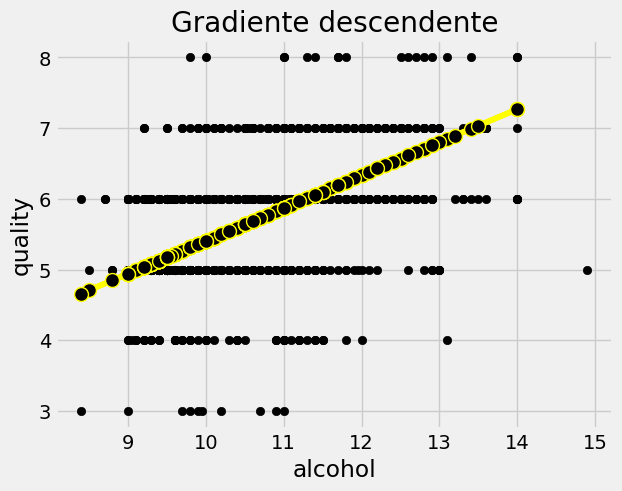

In [ ]:
# Graficando el modelo de regresión lineal ajustado y las predicciones en el conjunto de prueba
plt.plot(x_test_alcohol,y_pred_alcohol,marker='o',
         color='yellow',markerfacecolor='black',
         markersize=10)
plt.scatter(x_alcohol,y_alcohol,marker='o',color='black')
plt.ylabel("quality")
plt.xlabel("alcohol")
plt.title("Gradiente descendente")
plt.show()

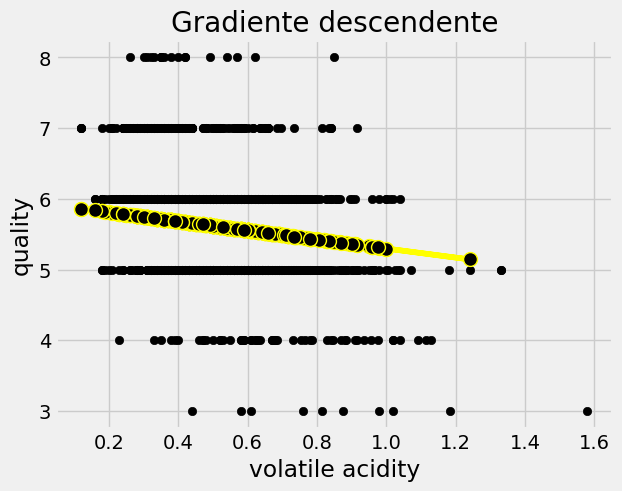

In [ ]:
# Graficando el modelo de regresión lineal ajustado y las predicciones en el conjunto de prueba
plt.plot(x_test_acidity,y_pred_acidity,marker='o',
         color='yellow',markerfacecolor='black',
         markersize=10)
plt.scatter(x_acidity,y_acidity,marker='o',color='black')
plt.ylabel("quality")
plt.xlabel("volatile acidity")
plt.title("Gradiente descendente")
plt.show()

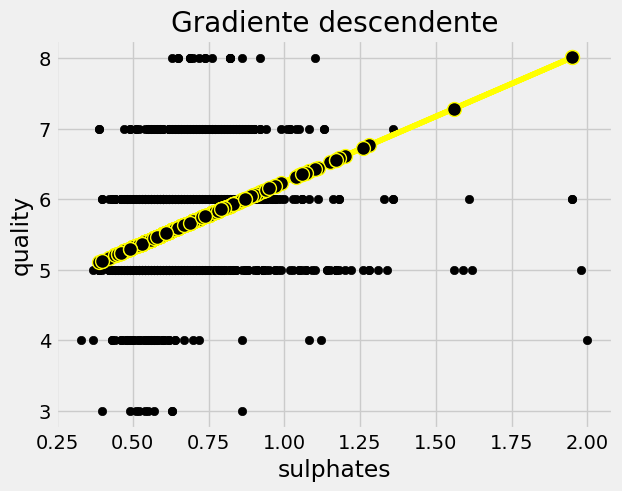

In [ ]:
# Graficando el modelo de regresión lineal ajustado y las predicciones en el conjunto de prueba
plt.plot(x_test_sulphates,y_pred_sulphates,marker='o',
         color='yellow',markerfacecolor='black',
         markersize=10)
plt.scatter(x_sulphates,y_sulphates,marker='o',color='black')
plt.ylabel("quality")
plt.xlabel("sulphates")
plt.title("Gradiente descendente")
plt.show()

## Se procede a utilizar la función stochastic gradient descent para cada atributo escogido

### Alcohol Stochastic

In [ ]:
# Dividiendo los datos en entrenamiento y prueba con una semilla aleatoria y una proporción 70-30
x_alcohol=np.array(dataset_red['alcohol'])
y_alcohol=np.array(dataset_red['quality'])
x_train,x_test_alcohol,y_train,y_test=train_test_split(x_alcohol,y_alcohol, test_size = 0.3, random_state=32)
lx=len(x_train)

In [ ]:
# La pendiente y el intercepto obtenidos
m,c=estocastico_gradiente_descendente(x_train,y_train,lx)
print(f"Pendiente {m}")
print(f"Intercepto {c}")

Pendiente [0.3770455]
Intercepto [1.79720319]


In [ ]:
# Predecir los valores de salida correspondientes a los datos de prueba
y_pred_alcohol=np.dot(m[0],x_test_alcohol)+c[0]

Métricas

In [ ]:
# Calculando diversas métricas para evaluar el desempeño del modelo de regresión lineal.
# Para R cuadrado como para el R cuadradro ajustado
r_2=r2_score(y_test,y_pred_alcohol)
print("R-cuadrado: ", r_2)
p=1
n=len(y_test)
r2_adj=1-(1-r_2)*(n-1)/(n-p-1)
print("R-cuadrado ajustado: ", r2_adj)
r2_alcohol_esto=r_2
r2_adj_alcohol_esto=1-(1-r_2)*(n-1)/(n-p-1)
error_alcohol_esto=np.sqrt(mean_squared_error(y_test,y_pred_alcohol))

R-cuadrado:  0.23751288835429485
R-cuadrado ajustado:  0.2359177270328603


### Volatile acidity Stochastic

In [ ]:
# Dividiendo los datos en entrenamiento y prueba con una semilla aleatoria y una proporción 70-30
x_acidity=np.array(dataset_red['volatile acidity'])
y_acidity=np.array(dataset_red['quality'])
x_train,x_test_acidity,y_train,y_test=train_test_split(x_acidity,y_acidity, test_size = 0.3, random_state=32)
lx=len(x_train)

In [ ]:
# La pendiente y el intercepto obtenidos
m,c=estocastico_gradiente_descendente(x_train,y_train,lx)
print(f"Pendiente {m}")
print(f"Intercepto {c}")

Pendiente [-1.91158088]
Intercepto [6.61559608]


In [ ]:
# Predecir los valores de salida correspondientes a los datos de prueba
y_pred_acidity=np.dot(m[0],x_test_acidity)+c[0]

Métricas

In [ ]:
# Calculando diversas métricas para evaluar el desempeño del modelo de regresión lineal.
# Para R cuadrado como para el R cuadradro ajustado
r_2=r2_score(y_test,y_pred_acidity)
print("R-cuadrado", r_2)
p=1
n=len(y_test)
r2_adj=1-(1-r_2)*(n-1)/(n-p-1)
print("R-cuadrado ajustado", r2_adj)
r2_acido_esto=r_2
r2_adj_aci_esto=1-(1-r_2)*(n-1)/(n-p-1)
error_volatile_esto=np.sqrt(mean_squared_error(y_test,y_pred_acidity))

R-cuadrado 0.09738591384510242
R-cuadrado ajustado 0.09549759985733064


### Sulphate Stochastic

In [ ]:
# Dividiendo los datos en entrenamiento y prueba con una semilla aleatoria y una proporción 70-30
x_sulphates=np.array(dataset_red['sulphates'])
y_sulphates=np.array(dataset_red['quality'])
x_train,x_test_sulphates,y_train,y_test=train_test_split(x_sulphates,y_sulphates, test_size = 0.3, random_state=32)
lx=len(x_train)

In [ ]:
# La pendiente y el intercepto obtenidos
m,c=estocastico_gradiente_descendente(x_train,y_train,lx)
print(f"Pendiente {m}")
print(f"Interecepto {c}")

Pendiente [1.34062495]
Interecepto [4.73768446]


In [ ]:
# Predecir los valores de salida correspondientes a los datos de prueba
y_pred_sulphates=np.dot(m[0],x_test_sulphates)+c[0]

Métricas

In [ ]:
# Calculando diversas métricas para evaluar el desempeño del modelo de regresión lineal.
# Para R cuadrado como para el R cuadradro ajustado
r_2=r2_score(y_test,y_pred_sulphates)
print("R-cuadrado: ", r_2)
p=1
n=len(y_test)
r2_adj=1-(1-r_2)*(n-1)/(n-p-1)
print("R-cuadrado ajustado: ", r2_adj)
r2_sulpahtes_esto=r_2
r2_adj_sukphates_esto=1-(1-r_2)*(n-1)/(n-p-1)
error_sulphates_esto=np.sqrt(mean_squared_error(y_test,y_pred_sulphates))

R-cuadrado:  0.015622747707738527
R-cuadrado ajustado:  0.013563381071143854


## Gráficos de regresión por atributo

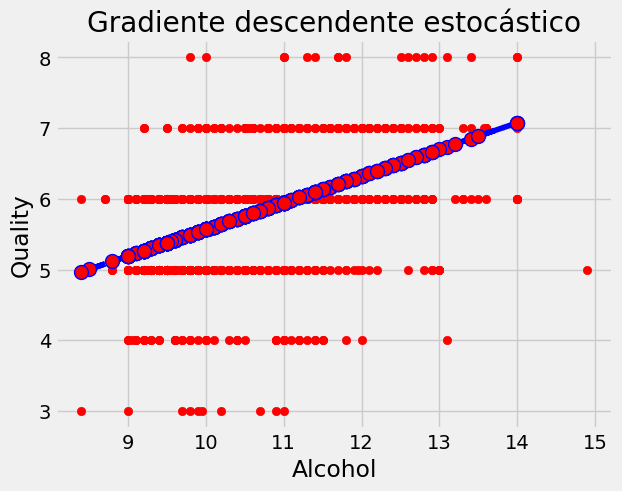

In [ ]:
# Graficando el modelo de regresión lineal ajustado
# Gradiente Descendente Estocástico para ajustar una línea recta que se ajuste a los datos.
plt.plot(x_test_alcohol,y_pred_alcohol,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x_alcohol,y_alcohol,marker='o',color='red')
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Gradiente descendente estocástico")
plt.show()

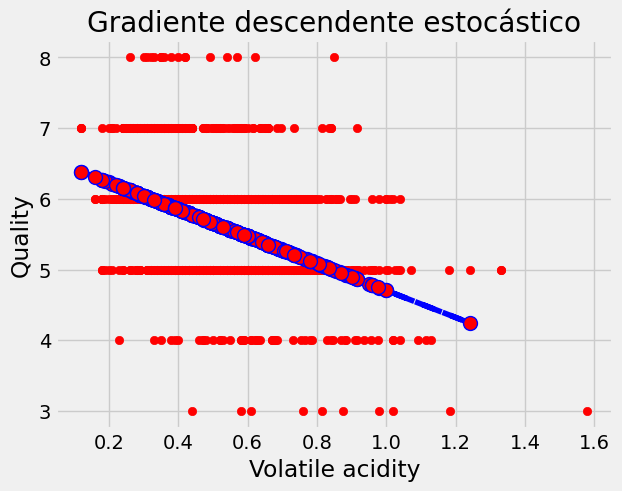

In [ ]:
# Graficando el modelo de regresión lineal ajustado
# Gradiente Descendente Estocástico para ajustar una línea recta que se ajuste a los datos.
plt.plot(x_test_acidity,y_pred_acidity,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x_acidity,y_acidity,marker='o',color='red')
plt.xlabel("Volatile acidity")
plt.ylabel("Quality")
plt.title("Gradiente descendente estocástico")
plt.show()

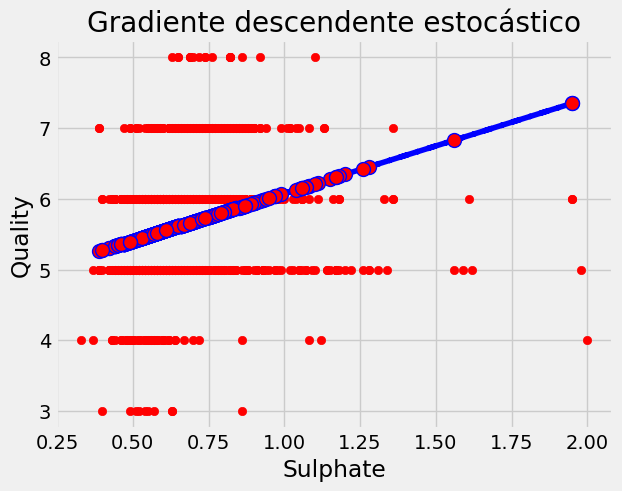

In [ ]:
# Graficando el modelo de regresión lineal ajustado
# Gradiente Descendente Estocástico para ajustar una línea recta que se ajuste a los datos.
plt.plot(x_test_sulphates,y_pred_sulphates,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x_sulphates,y_sulphates,marker='o',color='red')
plt.xlabel("Sulphate")
plt.ylabel("Quality")
plt.title("Gradiente descendente estocástico")
plt.show()

# Análisis de resultados y comentarios finales vinos rojos

In [ ]:
# Tabla de datos  que contiene valores numéricos de R2, R2 ajustado y error cuadrático para "batch" y "estocaistico"
import pandas as pd
from IPython.display import display

datos = [[r2_alcohol_batch,r2_alcohol_esto,r2_adj_alcohol_batch , r2_adj_alcohol_esto ,error_alcohol_batch ,error_alcohol_esto ],
         [r2_volatile_batch,r2_acido_esto ,r2_adj_volatile_batch ,r2_adj_aci_esto ,error_volatile_batch ,error_volatile_esto ],
         [r2_sulphates_batch,r2_sulpahtes_esto,r2_adj_sulphates_batch , r2_adj_sukphates_esto ,error_sulphates_batch , error_sulphates_esto],
]

columnas = ['R2 batch', 'R2 estocastico', 'R2 ajustado batch', 'R2 ajustado estocaistico','Error cuadratico batch','Error cuadratico estocas'] # definimos los nombres de las columnas
filas = ['Alcohol', 'Volatile Acidity', 'Sulphates'] # definimos los nombres de las filas

df = pd.DataFrame(datos, columns=columnas, index=filas)

display(df)

,R2 batch,R2 estocastico,R2 ajustado batch,R2 ajustado estocaistico,Error cuadratico batch,Error cuadratico estocas
Alcohol,0.203526,0.237513,0.201860,0.235918,0.692641,0.677702
Volatile Acidity,0.066519,0.097386,0.064566,0.095498,0.749851,0.737349
Sulphates,-0.025899,0.015623,-0.028045,0.013563,0.786094,0.770022


Al comparar los resultados obtenidos entre los modelos generados utilizando descenso de gradiente batch y estocástico para ajustar la regresión lineal del dataset de propiedades fisicoquímicas de los vinos tintos, podemos observar que el modelo ajustado con el algoritmo de descenso de gradiente estocástico está mucho mejor ajustado que el producido con el descenso de gradiente batch, pues para casi todas las propiedades estudiadas, el valor del RMSE era menor.

Podemos concluir que el algoritmo para ajustar la regresión lineal que mejores resultados da con este dataset específico es el descenso de gradiente estocástico.

Además de eso, se observa que el modelo que mejor se ajusta a la predicción que se quiere hacer es mediante el uso de la variable correspondiente al grado alcohólico del vino. Esto era de esperarse debido a que en el EDA realizado al inicio se podía observar una correlación más fuerte entre esta variable y la calidad del vino, a comparación de las otras características escogidas.

Ahora, en relación a las propiedades escogidas y el valor de $r^2$-ajustado, podemos concluir que la unica propiedad que mantiene una correlación debil es la del "alcohol" puesto que tiene una correlación mayor a 0.2. Por otro lado, el resto de propiedades no contienen una correlación significante, pues todas tienen un valor de $r^2$--ajustado menor a 0.2, no alcanzando a ser una correlación débil.

# Dataset vinos blancos

## EDA

A continuación se procederá a realizar el mismo procedimiento para el dataset de vinos blancos.

In [ ]:
# Encabezados de datos de la data  "vinos blancos"
dataset_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# Tipos de datos de la data "Vinos blancos"
dataset_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
# Descipcion de los datos
dataset_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Se observa que al igual que el otro dataset, no se tienen datos nulos, y se tiene una mayor cantidad de datos de entrada.

<Axes: >

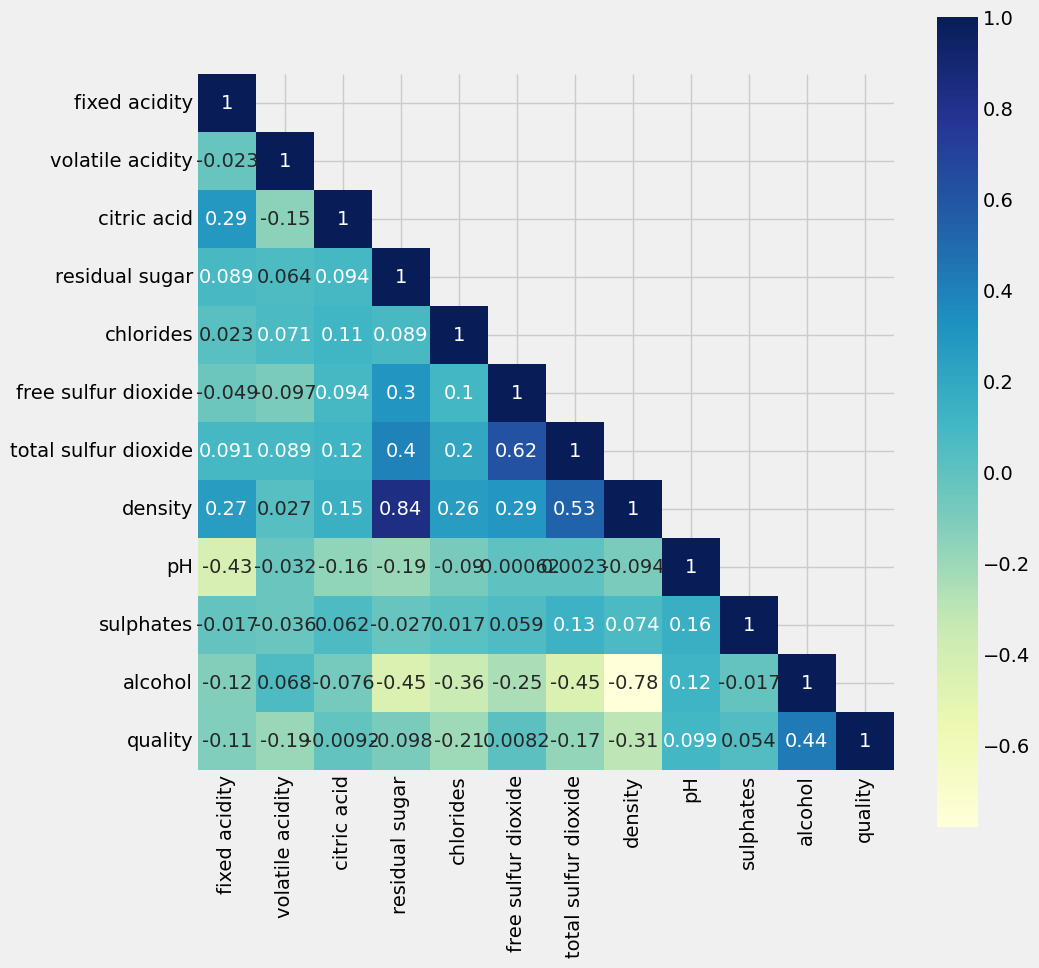

In [ ]:
# Grafica donde se calcula la matriz de correlación.
correlation= dataset_white.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")

A diferencia del dataset anterior, se observa que las variables que tienen mayor correlación con la calidad son los chlorides, el alcohol y la densidad del vino.

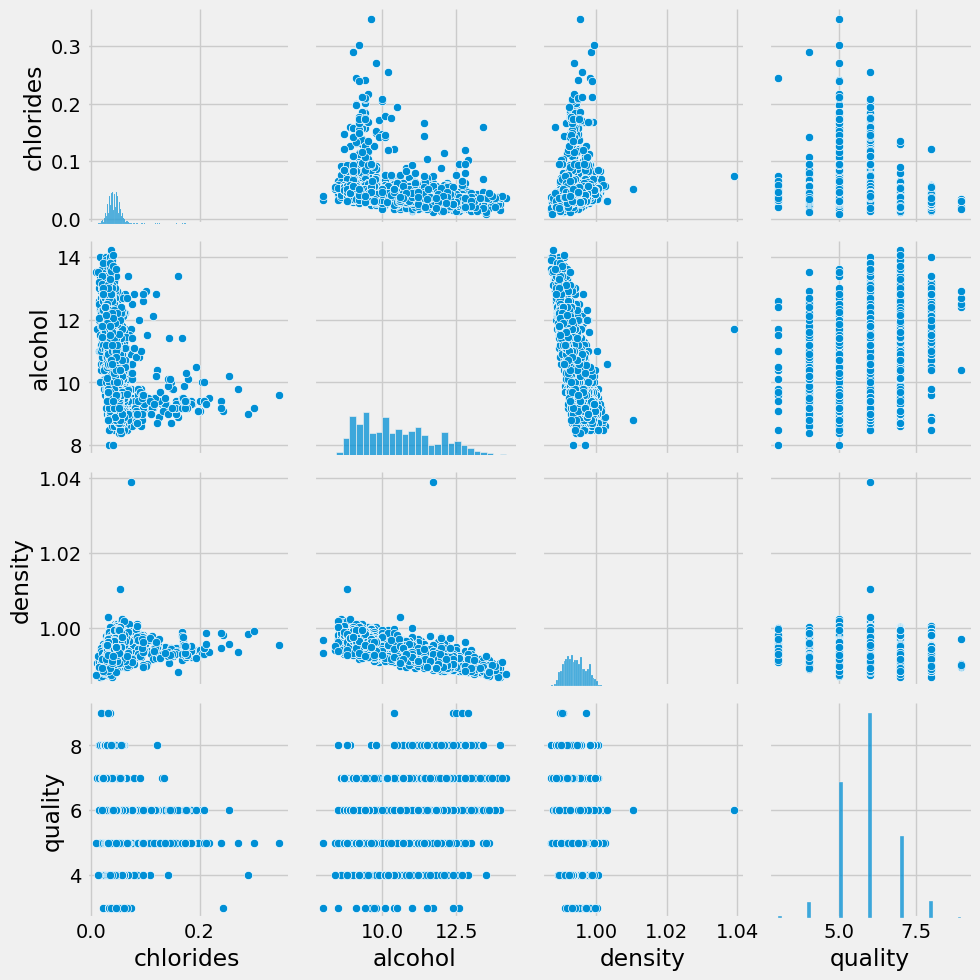

In [ ]:
# El gráfico de pares muestra la relación entre estas cuatro variables
### "chlorides", "alcohol", "density"y "quality".
sns.pairplot(dataset_white, vars=["chlorides", "alcohol", "density", "quality"])

Se pueden observar nuevamente las tendencias esperadas, a mayor chlorides y densidad, menor calidad y lo contrario para el alcohol, el cual tiene una relación positiva. Es importante destacar que para este dataframe la correlación se observa menos clara que para los vinos rojos, los datos parecen estar más dispersos con respecto a los atributos elegidos.

## Se procede a realizar el algoritmo de batch gradient descent para los atributos escogidos.

### Alcohol Batch

In [ ]:
# Dividiendo los datos en entrenamiento y prueba con una semilla aleatoria y una proporción 70-30
x_alcohol=np.array(dataset_white['alcohol'])
y_alcohol=np.array(dataset_white['quality'])
x_train,x_test_alcohol,y_train,y_test=train_test_split(x_alcohol,y_alcohol, test_size = 0.3, random_state=32)
lx=len(x_train)

In [ ]:
# La pendiente y el intercepto obtenidos
m,c=batch_gradiente_descendiente(x_train,y_train,lx)
print(f"Pendiente {m}")
print(f"Interecepto {c}")

Pendiente 0.43244764473010716
Interecepto 1.3170616646405233


In [ ]:
# Predecir los valores de salida correspondientes a los datos de prueba
y_pred_alcohol=np.dot(m,x_test_alcohol)+c


Métricas

In [ ]:
# Calculando diversas métricas para evaluar el desempeño del modelo de regresión lineal.
# Para R cuadrado como para el R cuadradro ajustado
r2_des=r2_score(y_test,y_pred_alcohol)
print("R-cuadrado: ", r2_des)
p=1
n=len(y_test)
r2_adj=1-(1-r2_des)*(n-1)/(n-p-1)
print("R-cuadrado ajustado: ", r2_adj)
blanco_r2_alcohol_batch=r2_des
blanco_r2_adj_alcohol_batch=1-(1-r2_des)*(n-1)/(n-p-1)
blanco_error_alcohol_batch=np.sqrt(mean_squared_error(y_test,y_pred_alcohol))

R-cuadrado:  0.1855443305564507
R-cuadrado ajustado:  0.1849895242421158


### Density Batch

In [ ]:
# Dividiendo los datos en entrenamiento y prueba con una semilla aleatoria y una proporción 70-30
x_density=np.array(dataset_white['density'])
y_density=np.array(dataset_white['quality'])
x_train,x_test_density,y_train,y_test=train_test_split(x_density,y_density, test_size = 0.3, random_state=32)
lx=len(x_train)

In [ ]:
# La pendiente y el intercepto obtenidos
m,c=batch_gradiente_descendiente(x_train,y_train,lx)
print(f"Pendiente {m}")
print(f"Intercepto {c}")

Pendiente 2.965070963557953
Intercepto 2.933797989718041


In [ ]:
# Predecir los valores de salida correspondientes a los datos de prueba
y_pred_density=np.dot(m,x_test_density)+c

Métricas

In [ ]:
# Calculando diversas métricas para evaluar el desempeño del modelo de regresión lineal.
# Para R cuadrado como para el R cuadradro ajustado
r2_des=r2_score(y_test,y_pred_density)
print("R-cuadrado: ", r2_des)
p=1
n=len(y_test)
r2_adj=1-(1-r2_des)*(n-1)/(n-p-1)
print("R-cuadrado ajustado: ", r2_adj)
blanco_r2_density_batch=r2_des
blanco_r2_adj_density_batch=1-(1-r2_des)*(n-1)/(n-p-1)
blanco_error_density_batch=np.sqrt(mean_squared_error(y_test,y_pred_density))

R-cuadrado:  -0.006562929323757238
R-cuadrado ajustado:  -0.0072485988941413115


### Chlorides Batch

In [ ]:
# Dividiendo los datos en entrenamiento y prueba con una semilla aleatoria y una proporción 70-30
x_chlorides=np.array(dataset_white['chlorides'])
y_chlorides=np.array(dataset_white['quality'])
x_train,x_test_chlorides,y_train,y_test=train_test_split(x_chlorides,y_chlorides,test_size = 0.3, random_state=32)
lx=len(x_train)

In [ ]:
# La pendiente y el intercepto obtenidos
m,c=batch_gradiente_descendiente(x_train,y_train,lx)
print(f"Pendiente {m}")
print(f"Intercepto {c}")

Pendiente 0.15521516467836027
Intercepto 5.874270679102277


In [ ]:
# Predecir los valores de salida correspondientes a los datos de prueba
y_pred_chlorides=np.dot(m,x_test_chlorides)+c

Métricas

In [ ]:
# Calculando diversas métricas para evaluar el desempeño del modelo de regresión lineal.
# Para R cuadrado como para el R cuadradro ajustado
r2_des=r2_score(y_test,y_pred_chlorides)
print("R-cuadrado: ", r2_des)
p=1
n=len(y_test)
r2_adj=1-(1-r2_des)*(n-1)/(n-p-1)
print("R-cuadrado ajustado: ", r2_adj)
blanco_r2_chlorides_batch=r2_des
blanco_r2_adj_chlorides_batch=1-(1-r2_des)*(n-1)/(n-p-1)
blanco_error_chlorides_batch=np.sqrt(mean_squared_error(y_test,y_pred_chlorides))

R-cuadrado:  -0.0017032767251468073
R-cuadrado ajustado:  -0.002385635905477246


## Gráficos de regresiones por atributo

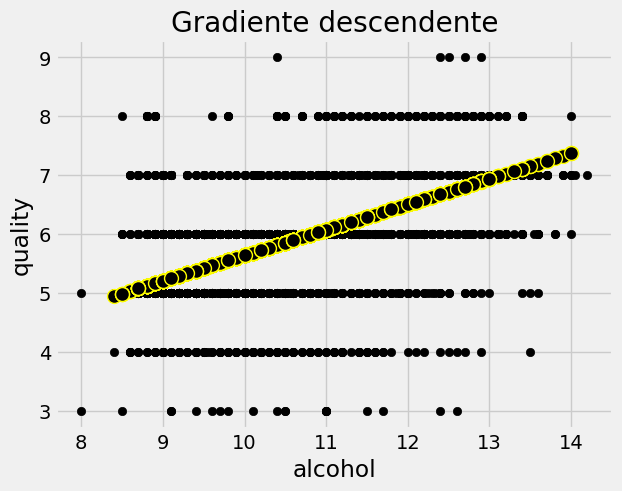

In [ ]:
# Graficando el modelo de regresión lineal ajustado y las predicciones en el conjunto de prueba del gradiante descendente
plt.plot(x_test_alcohol,y_pred_alcohol,marker='o',
         color='yellow',markerfacecolor='black',
         markersize=10)
plt.scatter(x_alcohol,y_alcohol,marker='o',color='black')
plt.ylabel("quality")
plt.xlabel("alcohol")
plt.title("Gradiente descendente")
plt.show()

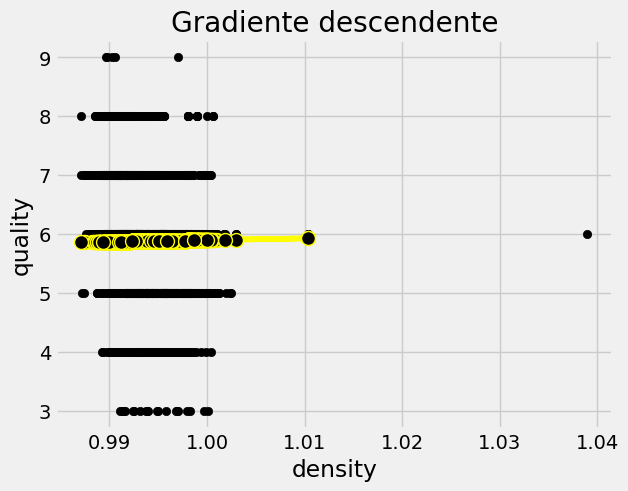

In [ ]:
# Graficando el modelo de regresión lineal ajustado y las predicciones en el conjunto de prueba del gradiante descendente
plt.plot(x_test_density,y_pred_density,marker='o',
         color='yellow',markerfacecolor='black',
         markersize=10)
plt.scatter(x_density,y_density,marker='o',color='black')
plt.ylabel("quality")
plt.xlabel("density")
plt.title("Gradiente descendente")
plt.show()

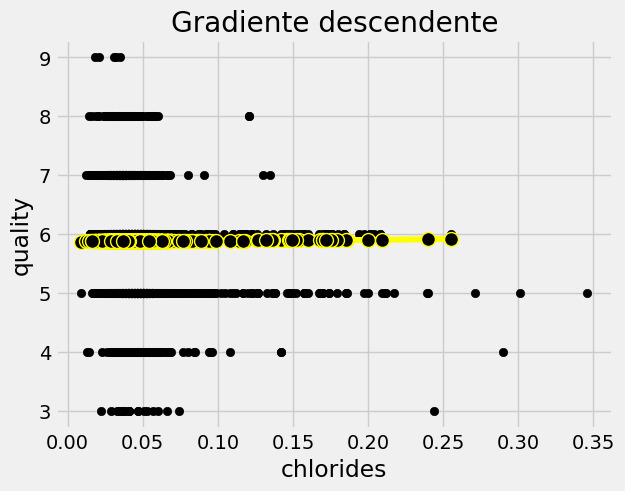

In [ ]:
# Graficando el modelo de regresión lineal ajustado y las predicciones en el conjunto de prueba del gradiante descendente
plt.plot(x_test_chlorides,y_pred_chlorides,marker='o',
         color='yellow',markerfacecolor='black',
         markersize=10)
plt.scatter(x_chlorides,y_chlorides,marker='o',color='black')
plt.ylabel("quality")
plt.xlabel("chlorides")
plt.title("Gradiente descendente")
plt.show()

## Se realiza uso de algoritmo estocástico para los atributos escogidos




### Alcohol Stochastic

In [ ]:
# Dividiendo los datos en entrenamiento y prueba con una semilla aleatoria y una proporción 70-30
x_alcohol=np.array(dataset_white['alcohol'])
y_alcohol=np.array(dataset_white['quality'])
x_train,x_test_alcohol,y_train,y_test=train_test_split(x_alcohol,y_alcohol, test_size = 0.3, random_state=32)
lx=len(x_train)

In [ ]:
# La pendiente y el intercepto obtenidos
m,c=estocastico_gradiente_descendente(x_train,y_train,lx)
print(f"Pendiente {m}")
print(f"Intercepto {c}")

Pendiente [0.30872765]
Intercepto [2.67935214]


In [ ]:
# Predecir los valores de salida correspondientes a los datos de prueba
y_pred_alcohol=np.dot(m[0],x_test_alcohol)+c[0]

In [ ]:
# Calculando diversas métricas para evaluar el desempeño del modelo de regresión lineal.
# Para R cuadrado como para el R cuadradro ajustado
r_2=r2_score(y_test,y_pred_alcohol)
print("R-cuadrado: ", r_2)
p=1
n=len(y_test)
r2_adj=1-(1-r_2)*(n-1)/(n-p-1)
print("R-cuadrado ajustado: ", r2_adj)
blanco_r2_alcohol_estocastico=r_2
blanco_r2_adj_alcohol_estocastico=1-(1-r_2)*(n-1)/(n-p-1)
blanco_error_alcohol_estocastico=np.sqrt(mean_squared_error(y_test,y_pred_alcohol))

R-cuadrado:  0.20178733207317878
R-cuadrado ajustado:  0.2012435904737736


### Density Stochastic

In [ ]:
# Dividiendo los datos en entrenamiento y prueba con una semilla aleatoria y una proporción 70-30
x_density=np.array(dataset_white['density'])
y_density=np.array(dataset_white['quality'])
x_train,x_test_density,y_train,y_test=train_test_split(x_density,y_density, test_size = 0.3, random_state=32)
lx=len(x_train)

In [ ]:
# La pendiente y el intercepto obtenidos
m,c=estocastico_gradiente_descendente(x_train,y_train,lx)
print(f"Pendiente {m}")
print(f"Intercepto {c}")

Pendiente [1.99447503]
Intercepto [3.82145052]


In [ ]:
# Predecir los valores de salida correspondientes a los datos de prueba
y_pred_density=np.dot(m[0],x_test_density)+c[0]

In [ ]:
# Calculando diversas métricas para evaluar el desempeño del modelo de regresión lineal.
# Para R cuadrado como para el R cuadradro ajustado
r_2=r2_score(y_test,y_pred_density)
print("R-cuadrado: ", r_2)
p=1
n=len(y_test)
r2_adj=1-(1-r_2)*(n-1)/(n-p-1)
print("R-cuadrado ajustado: ", r2_adj)
blanco_r2_density_estocastico=r_2
blanco_r2_adj_density_estocastico=1-(1-r_2)*(n-1)/(n-p-1)
blanco_error_density_estocastico=np.sqrt(mean_squared_error(y_test,y_pred_density))

R-cuadrado:  -0.00962169936104118
R-cuadrado ajustado:  -0.010309452562240917


### Chlorides Stochastic

In [ ]:
# Dividiendo los datos en entrenamiento y prueba con una semilla aleatoria y una proporción 70-30
x_chlorides=np.array(dataset_white['chlorides'])
y_chlorides=np.array(dataset_white['quality'])
x_train,x_test_chlorides,y_train,y_test=train_test_split(x_chlorides,y_chlorides,test_size = 0.3, random_state=32)
lx=len(x_train)

In [ ]:
# La pendiente y el intercepto obtenidos
m,c=estocastico_gradiente_descendente(x_train,y_train,lx)
print(f"Pendiente {m}")
print(f"Intercepto {c}")

Pendiente [-4.62700505]
Intercepto [6.09114413]


In [ ]:
# Predecir los valores de salida correspondientes a los datos de prueba
y_pred_chlorides=np.dot(m[0],x_test_chlorides)+c[0]

In [ ]:
# Calculando diversas métricas para evaluar el desempeño del modelo de regresión lineal.
# Para R cuadrado como para el R cuadradro ajustado
r_2=r2_score(y_test,y_pred_chlorides)
print("R-cuadrado: ", r_2)
p=1
n=len(y_test)
r2_adj=1-(1-r_2)*(n-1)/(n-p-1)
print("R-cuadrado ajustado: ", r2_adj)
blanco_r2_chloride_estocastico=r_2
blanco_r2_adj_choride_estocastico=1-(1-r_2)*(n-1)/(n-p-1)
blanco_error_chloride_estocastico=np.sqrt(mean_squared_error(y_test,y_pred_chlorides))

R-cuadrado:  0.032930847669373486
R-cuadrado ajustado:  0.032272081216832116


## Gráfico de regresiones por atributo

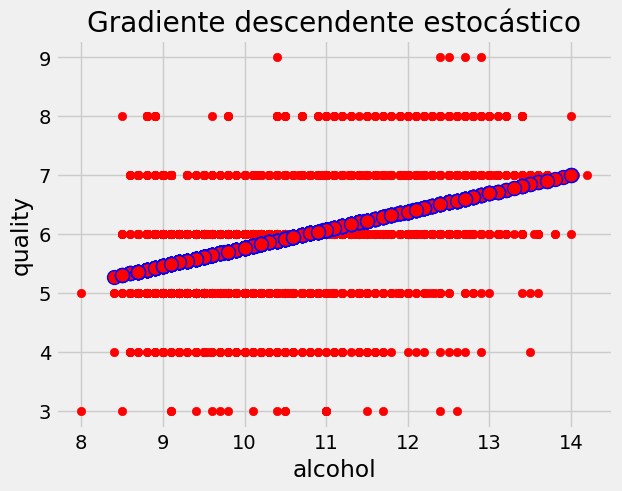

In [ ]:
# Graficando el modelo de regresión lineal ajustado
# Gradiente Descendente Estocástico para ajustar una línea recta que se ajuste a los datos.
plt.plot(x_test_alcohol,y_pred_alcohol,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x_alcohol,y_alcohol,marker='o',color='red')
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.title("Gradiente descendente estocástico")
plt.show()

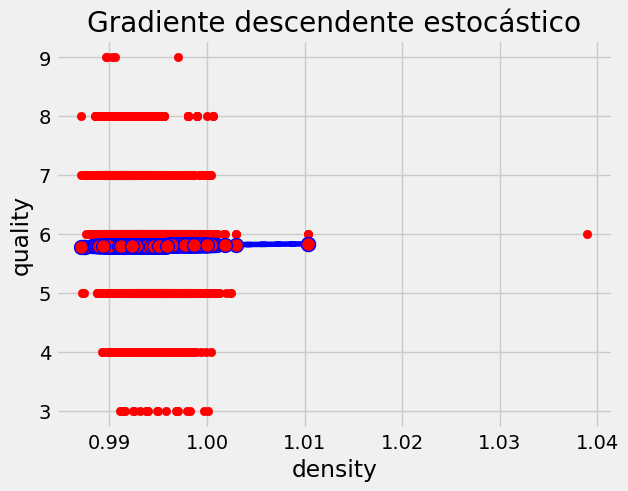

In [ ]:
# Graficando el modelo de regresión lineal ajustado
# Gradiente Descendente Estocástico para ajustar una línea recta que se ajuste a los datos.
plt.plot(x_test_density,y_pred_density,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x_density,y_density,marker='o',color='red')
plt.xlabel("density")
plt.ylabel("quality")
plt.title("Gradiente descendente estocástico")
plt.show()

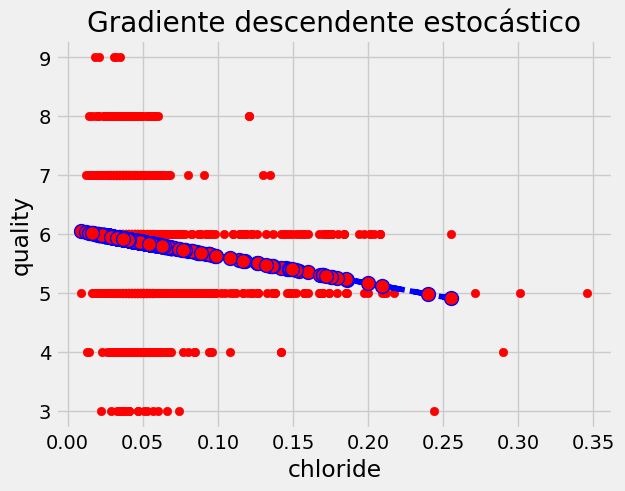

In [ ]:
# Graficando el modelo de regresión lineal ajustado
# Gradiente Descendente Estocástico para ajustar una línea recta que se ajuste a los datos.
plt.plot(x_test_chlorides,y_pred_chlorides,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x_chlorides,y_chlorides,marker='o',color='red')
plt.xlabel("chloride")
plt.ylabel("quality")
plt.title("Gradiente descendente estocástico")
plt.show()

# Análisis de resultados y comentarios finales vinos blancos

In [ ]:
# Tabla de datos  que contiene valores numéricos de R2, R2 ajustado y error cuadrático para "batch" y "estocaistico"
import pandas as pd
from IPython.display import display


datos = [[blanco_r2_alcohol_batch,blanco_r2_alcohol_estocastico,blanco_r2_adj_alcohol_batch , blanco_r2_adj_alcohol_estocastico ,blanco_error_alcohol_batch ,blanco_error_alcohol_estocastico ],
         [blanco_r2_density_batch,blanco_r2_density_estocastico ,blanco_r2_adj_density_batch ,blanco_r2_adj_density_estocastico ,blanco_error_density_batch ,blanco_error_density_estocastico ],
         [blanco_r2_chlorides_batch,blanco_r2_chloride_estocastico,blanco_r2_adj_chlorides_batch , blanco_r2_adj_choride_estocastico ,blanco_error_chlorides_batch , blanco_error_chloride_estocastico ],
]

columnas = ['R2 batch', 'R2 estocastico', 'R2 ajustado batch', 'R2 ajustado estocaistico','Error cuadratico batch','Error cuadratico estocas'] # definimos los nombres de las columnas
filas = ['Alcohol', 'Density', 'chloride'] # definimos los nombres de las filas

df = pd.DataFrame(datos, columns=columnas, index=filas)

display(df)

,R2 batch,R2 estocastico,R2 ajustado batch,R2 ajustado estocaistico,Error cuadratico batch,Error cuadratico estocas
Alcohol,0.185544,0.201787,0.184990,0.201244,0.806826,0.798740
Density,-0.006563,-0.009622,-0.007249,-0.010309,0.896946,0.898308
chloride,-0.001703,0.032931,-0.002386,0.032272,0.894778,0.879174


Como se puede apreciar en la tabla, para este dataset de propiedades fisicoquímicas de vinos blancos, no hay una diferencia notable entre el RMSE de los modelos ajustados con regresión lineal batch y estocástica, por lo que nos conviene más ajustar nuestros modelos utilizando la regresión lineal estocástica dada su ventaja respecto a la batch en complejidad computacional.

Hablando de las métricas, podemos concluir que la única propiedad que tiene una débil correlación es el alcohol, con un valor de $r^2$-ajustado de $~0.201$, mientras que las otras propiedades (cloruros y densidad) parecen no ser significantes y afectar en la calidad final de cada vino.

Lo anterior, al igual que para los vinos rojos, se relaciona a lo esperado luego de realizar el EDA para este nuevo set de datos.